<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/Fourier_third_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.datasets import load_sample_image


In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [4]:
hW, hH = 600,300
hFreq = 10.5
x = np.linspace( 0, 1, 2*hW)     # columns (Width)
y = np.linspace( 0, 1, 2*hH)     # rows (Height)
[X,Y] = np.meshgrid(x,y)
Sin = np.sin(hFreq * np.pi * 2 * X)
W,H = np.shape(Sin)

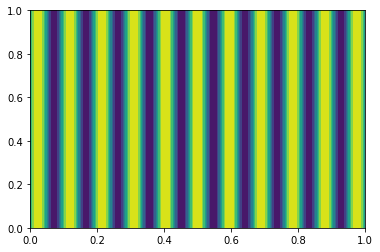

In [5]:
plt.contourf(X,Y,Sin)

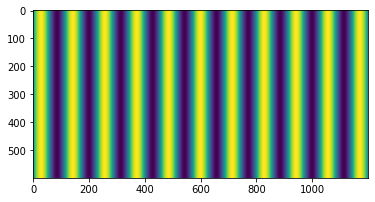

In [6]:
plt.imshow(Sin)

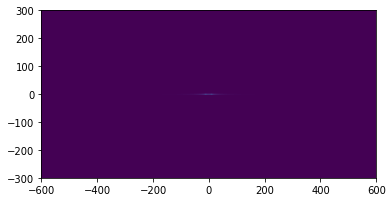

In [7]:
Fourier = np.fft.fft2(Sin)/(W*H)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier)+0.001)
plt.imshow(P, extent=[-hW,hW,-hH,hH])

In [8]:
flower = load_sample_image("flower.jpg") / 255
flower =  rgb2gray(flower)
H, W = flower.shape

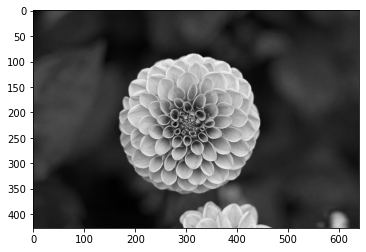

In [14]:
plt.imshow(flower, cmap='gray')
height, width = np.shape(flower)

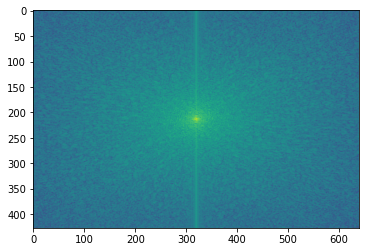

In [53]:
Fourier = np.fft.fft2(flower)
Fourier = np.fft.fftshift(Fourier)
P = np.log(np.abs(Fourier))
plt.imshow(P)


In [54]:
for i in range(height):
  for j in range(width):
    if (j-width/2)**2 + (i-height/2)**2 < 10:
      Fourier[i,j] = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


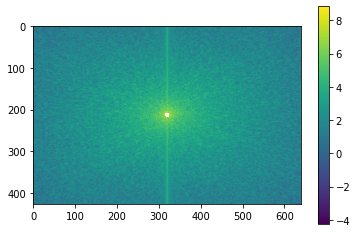

In [55]:
p = np.abs(Fourier)
plt.imshow(np.log(p))
plt.colorbar()

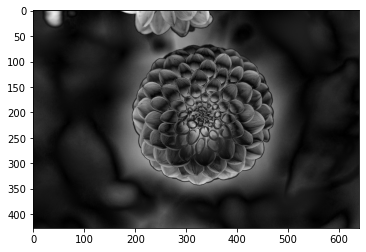

In [56]:
Flower = np.fft.fft2(Fourier)
plt.imshow(np.abs(Flower), cmap='gray')